In [146]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

##### Importing data 

In [147]:
telecom = pd.read_csv("train/train.csv")
telecom.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


### Understanding the data

In [148]:
telecom.shape

(69999, 172)

In [149]:
telecom.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,133.153275,133.894438,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,334.213918,344.366927,351.924315,299.963093,311.277193,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,93.581000,86.714000,84.095000,7.410000,6.675000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,197.484000,191.588000,192.234000,34.110000,32.280000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,370.791000,365.369500,369.909000,119.390000,115.837500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,69998.000000,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,33.000000,41.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


In [150]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [151]:
pd.options.display.max_rows = 200

In [152]:
cols = pd.DataFrame(telecom.columns)
cols.head(172)

,0
0,id
1,circle_id
2,loc_og_t2o_mou
3,std_og_t2o_mou
4,loc_ic_t2o_mou
5,last_date_of_month_6
6,last_date_of_month_7
7,last_date_of_month_8
8,arpu_6
9,arpu_7


### Calculating High value customer :
we will create a new filed for avg_rech_amt ( Average recharge amount ) by taking a average of total_rech_amt_6 and total_rech_amt_7 (  we will ignore total_rech_amt8 as customer might take some action on 8th month  ).

After getting average , we will take consider customer having more than 70 percentile of avg_rech_amt as Highly valued customer

In [153]:
telecom["total_rech_amt_6"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 69999 entries, 0 to 69998
Series name: total_rech_amt_6
Non-Null Count  Dtype
--------------  -----
69999 non-null  int64
dtypes: int64(1)
memory usage: 547.0 KB


In [154]:
telecom["total_rech_amt_7"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 69999 entries, 0 to 69998
Series name: total_rech_amt_7
Non-Null Count  Dtype
--------------  -----
69999 non-null  int64
dtypes: int64(1)
memory usage: 547.0 KB


In [155]:
# Calculating average
telecom["avg_rech_amt"] = (telecom["total_rech_amt_6"] + telecom["total_rech_amt_7"])/2
telecom["avg_rech_amt"]

0         71.0
1         72.5
2         95.0
3        200.0
4        213.0
         ...  
69994    223.5
69995    256.5
69996    438.0
69997    315.5
69998    124.0
Name: avg_rech_amt, Length: 69999, dtype: float64

<Figure size 1080x360 with 0 Axes>

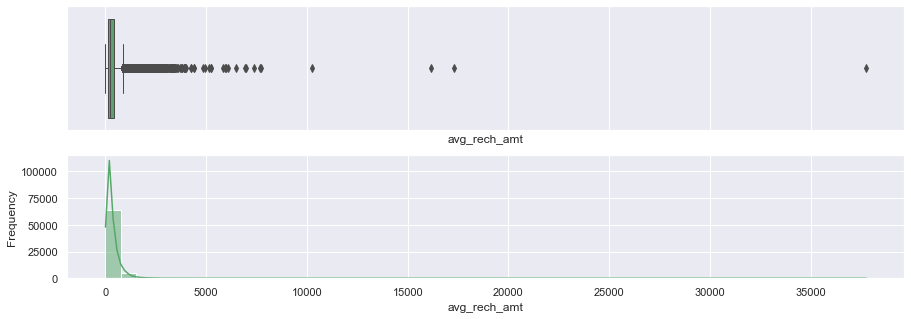

In [156]:
plt.figure()
plt.tight_layout()
sns.set(rc={"figure.figsize":(15, 5)})
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
plt.gca().set(xlabel= "avg_rech_amt",ylabel='Frequency')
sns.boxplot(telecom["avg_rech_amt"],ax=ax_box , linewidth= 1.0,color="g")
sns.histplot(telecom["avg_rech_amt"], ax=ax_hist , bins = 50,kde=True,color="g")
plt.show()

In [157]:
telecom["avg_rech_amt"].describe()

count    69999.000000
mean       325.258075
std        376.172653
min          0.000000
25%        115.000000
50%        229.000000
75%        419.750000
max      37762.500000
Name: avg_rech_amt, dtype: float64

In [158]:
telecom["avg_rech_amt"].quantile(0.7)

370.0

In [159]:
# Considering all customer having average recharge amount more than 70 percentile
telecom_high_value_customer = telecom[telecom["avg_rech_amt"] > telecom["avg_rech_amt"].quantile(0.7) ]
telecom_high_value_customer.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,avg_rech_amt
12,12,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,439.919,397.946,...,0,NaN,NaN,NaN,322,0.0,0.0,0.0,0,469.5
15,15,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,580.549,377.294,...,0,1.0,NaN,1.0,602,0.0,0.0,0.0,0,527.0
23,23,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1130.948,905.506,...,0,NaN,NaN,NaN,455,0.0,0.0,0.0,0,1205.0
24,24,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,371.974,352.069,...,0,0.0,0.0,0.0,1219,0.0,0.0,0.0,0,433.5
25,25,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,362.951,321.763,...,0,NaN,NaN,NaN,2831,0.0,0.0,0.0,0,405.0


In [160]:
telecom_high_value_customer["avg_rech_amt"]

12        469.5
15        527.0
23       1205.0
24        433.5
25        405.0
          ...  
69981     610.5
69983     410.0
69984    1398.0
69990     413.0
69996     438.0
Name: avg_rech_amt, Length: 20951, dtype: float64

<Figure size 1080x360 with 0 Axes>

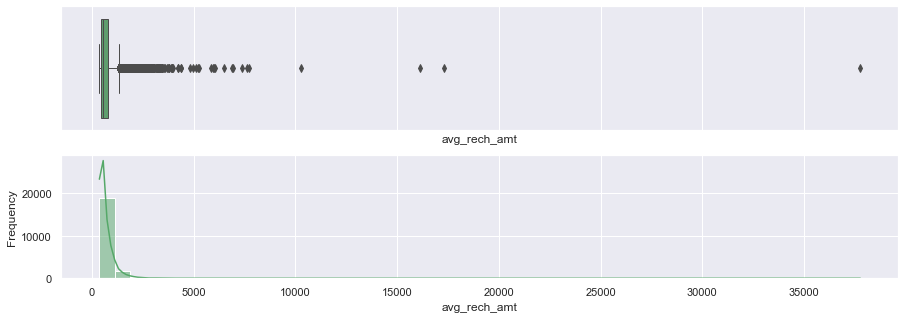

In [161]:
plt.figure()
plt.tight_layout()
sns.set(rc={"figure.figsize":(15, 5)})
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
plt.gca().set(xlabel= "avg_rech_amt",ylabel='Frequency')
sns.boxplot(telecom_high_value_customer["avg_rech_amt"],ax=ax_box , linewidth= 1.0,color="g")
sns.histplot(telecom_high_value_customer["avg_rech_amt"], ax=ax_hist , bins = 50,kde=True,color="g")
plt.show()

## Performing EDA on High value customer data

In [162]:
telecom_high_value_customer.shape

(20951, 173)

In [163]:
telecom_high_value_customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20951 entries, 12 to 69996
Columns: 173 entries, id to avg_rech_amt
dtypes: float64(136), int64(28), object(9)
memory usage: 27.8+ MB


In [164]:
# Univariate analysis
telecom_high_value_customer = telecom_high_value_customer.drop(["id"], axis= 1 )
telecom_high_value_customer.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,...,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,avg_rech_amt
12,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,439.919,397.946,392.024,...,0,NaN,NaN,NaN,322,0.0,0.0,0.0,0,469.5
15,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,580.549,377.294,338.286,...,0,1.0,NaN,1.0,602,0.0,0.0,0.0,0,527.0
23,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1130.948,905.506,479.762,...,0,NaN,NaN,NaN,455,0.0,0.0,0.0,0,1205.0
24,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,371.974,352.069,240.449,...,0,0.0,0.0,0.0,1219,0.0,0.0,0.0,0,433.5
25,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,362.951,321.763,689.603,...,0,NaN,NaN,NaN,2831,0.0,0.0,0.0,0,405.0


In [165]:
# Creating two data frames for categorical and numerical variable to perform EDA
telecom_high_value_customer_numerical_variable = telecom_high_value_customer.select_dtypes([np.int64,np.float64])
telecom_high_value_customer_categorical_variable = telecom_high_value_customer.select_dtypes([np.object])

In [166]:
telecom_high_value_customer_numerical_variable.shape

(20951, 163)

In [167]:
telecom_high_value_customer_categorical_variable.shape

(20951, 9)

In [168]:
#Visualizing categorical variable
"""
for i, col in enumerate(telecom_high_value_customer_categorical_variable.columns):
    plt.figure(i,figsize=(15,4))
    sns.countplot(x=col, data=telecom_high_value_customer_categorical_variable)
    plt.xticks(rotation=45, fontsize=12)
"""

'\nfor i, col in enumerate(telecom_high_value_customer_categorical_variable.columns):\n    plt.figure(i,figsize=(15,4))\n    sns.countplot(x=col, data=telecom_high_value_customer_categorical_variable)\n    plt.xticks(rotation=45, fontsize=12)\n'

In [169]:
#Visualizing numerical variables
"""
for i in telecom_high_value_customer_numerical_variable.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(15, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(telecom_high_value_customer_numerical_variable[i], ax=ax_box , linewidth= 1.0,color="g")
    sns.histplot(telecom_high_value_customer_numerical_variable[i], ax=ax_hist , bins = 50,kde=True,color="g")
    plt.show()
"""

'\nfor i in telecom_high_value_customer_numerical_variable.columns:\n    plt.figure()\n    plt.tight_layout()\n    sns.set(rc={"figure.figsize":(15, 5)})\n    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)\n    plt.gca().set(xlabel= i,ylabel=\'Frequency\')\n    sns.boxplot(telecom_high_value_customer_numerical_variable[i], ax=ax_box , linewidth= 1.0,color="g")\n    sns.histplot(telecom_high_value_customer_numerical_variable[i], ax=ax_hist , bins = 50,kde=True,color="g")\n    plt.show()\n'

### Bivariate analysis - Numerical variables


In [170]:
#Visualing the relationship Chrun Probability with predictor continuious/numerical varianle
"""
fig,axs= plt.subplots(54,3,figsize=(20,300))
for feature,ax in zip(telecom_high_value_customer_numerical_variable.columns,axs.flatten()):
    sns.scatterplot(x=feature, y='churn_probability', hue='churn_probability',data=telecom_high_value_customer_numerical_variable,ax=ax,palette='icefire')
    plt.xlabel(feature,fontsize=12)
    plt.ylabel('churn_probability',fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    ax.set_title('churn_probability '+' vs '+str(feature),fontsize=15)
"""

"\nfig,axs= plt.subplots(54,3,figsize=(20,300))\nfor feature,ax in zip(telecom_high_value_customer_numerical_variable.columns,axs.flatten()):\n    sns.scatterplot(x=feature, y='churn_probability', hue='churn_probability',data=telecom_high_value_customer_numerical_variable,ax=ax,palette='icefire')\n    plt.xlabel(feature,fontsize=12)\n    plt.ylabel('churn_probability',fontsize=12)\n    plt.xticks(fontsize=12)\n    plt.yticks(fontsize=12)\n    ax.set_title('churn_probability '+' vs '+str(feature),fontsize=15)\n"

## Missing value imputation

In [171]:
# Missing value inputation
print("% of null values in each column")
print(round(telecom_high_value_customer.isnull().sum()/len(telecom_high_value_customer.index)*100,2).sort_values(ascending=False)[ round(telecom_high_value_customer.isnull().sum()/len(telecom_high_value_customer.index),2) > 0 ] )

% of null values in each column
fb_user_6                   62.37
count_rech_3g_6             62.37
arpu_3g_6                   62.37
arpu_2g_6                   62.37
night_pck_user_6            62.37
date_of_last_rech_data_6    62.37
av_rech_amt_data_6          62.37
total_rech_data_6           62.37
max_rech_data_6             62.37
count_rech_2g_6             62.37
fb_user_7                   61.40
night_pck_user_7            61.40
date_of_last_rech_data_7    61.40
total_rech_data_7           61.40
max_rech_data_7             61.40
count_rech_2g_7             61.40
arpu_3g_7                   61.40
av_rech_amt_data_7          61.40
arpu_2g_7                   61.40
count_rech_3g_7             61.40
total_rech_data_8           61.12
max_rech_data_8             61.12
arpu_2g_8                   61.12
fb_user_8                   61.12
av_rech_amt_data_8          61.12
date_of_last_rech_data_8    61.12
count_rech_3g_8             61.12
night_pck_user_8            61.12
count_rech_2g_8 

In [172]:
telecom_high_value_customer.fb_user_6.info()

<class 'pandas.core.series.Series'>
Int64Index: 20951 entries, 12 to 69996
Series name: fb_user_6
Non-Null Count  Dtype  
--------------  -----  
7884 non-null   float64
dtypes: float64(1)
memory usage: 327.4 KB


In [173]:
telecom_high_value_customer["fb_user_6"].value_counts()

1.0    7084
0.0     800
Name: fb_user_6, dtype: int64

In [174]:
telecom_high_value_customer.shape

(20951, 172)

In [175]:
telecom_high_value_customer["fb_user_6"].isnull().sum()

13067

#### Dropping the columns having more than 60% null values

In [176]:
column_to_be_dropped=['fb_user_6','count_rech_3g_6','arpu_3g_6','arpu_2g_6','night_pck_user_6','date_of_last_rech_data_6','av_rech_amt_data_6','total_rech_data_6','max_rech_data_6','count_rech_2g_6','fb_user_7','night_pck_user_7','date_of_last_rech_data_7','total_rech_data_7','max_rech_data_7','count_rech_2g_7','arpu_3g_7','av_rech_amt_data_7','arpu_2g_7','count_rech_3g_7','total_rech_data_8','max_rech_data_8','arpu_2g_8','fb_user_8','av_rech_amt_data_8','date_of_last_rech_data_8','count_rech_3g_8','night_pck_user_8','count_rech_2g_8','arpu_3g_8']

In [177]:
telecom_high_value_customer = telecom_high_value_customer.drop(column_to_be_dropped, axis=1 )

In [178]:
# Missing value inputation
print("% of null values in each column")
print(round(telecom_high_value_customer.isnull().sum()/len(telecom_high_value_customer.index)*100,2).sort_values(ascending=False)[ round(telecom_high_value_customer.isnull().sum()/len(telecom_high_value_customer.index),2) > 0 ] )


% of null values in each column
roam_og_mou_8           3.11
loc_og_mou_8            3.11
loc_og_t2c_mou_8        3.11
std_og_mou_8            3.11
loc_og_t2m_mou_8        3.11
std_ic_t2o_mou_8        3.11
loc_ic_t2m_mou_8        3.11
loc_og_t2t_mou_8        3.11
std_ic_t2t_mou_8        3.11
isd_og_mou_8            3.11
std_og_t2m_mou_8        3.11
std_ic_t2f_mou_8        3.11
spl_og_mou_8            3.11
roam_ic_mou_8           3.11
std_ic_mou_8            3.11
offnet_mou_8            3.11
std_og_t2c_mou_8        3.11
og_others_8             3.11
onnet_mou_8             3.11
loc_ic_mou_8            3.11
std_og_t2f_mou_8        3.11
spl_ic_mou_8            3.11
std_og_t2t_mou_8        3.11
loc_ic_t2f_mou_8        3.11
isd_ic_mou_8            3.11
loc_ic_t2t_mou_8        3.11
std_ic_t2m_mou_8        3.11
ic_others_8             3.11
loc_og_t2f_mou_8        3.11
date_of_last_rech_8     1.97
std_og_t2c_mou_6        1.06
loc_og_mou_6            1.06
std_og_mou_6            1.06
std_ic_t2m_

In [179]:
# Routine to find column having 95% same value
def redundantColumnns(dataframe):
    columns = []
    for column in dataframe.columns:
        counts = dataframe[column].value_counts()
        maximum_occurance = counts.iloc[0]
        if maximum_occurance/len(dataframe) * 100 > 95 :
            columns.append(column)
    columns = list(columns)
    return columns

In [180]:
# Trying to see how many column have 95% same data. We are not deleting thse column
colums_having_95_percent_same_data = redundantColumnns(telecom_high_value_customer)
colums_having_95_percent_same_data

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'og_others_7',
 'og_others_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

In [181]:
# Check columns for only 1 unique value ( same value in all fiels )
def columnHavingUniqueValue(dataframe):
    drop_col_unique_val = []
    for col in dataframe.columns:
        if dataframe[f'{col}'].nunique() == 1:
            drop_col_unique_val.append(col)
    return drop_col_unique_val

In [182]:
# Checking colum having unique value
columnHavingUniqueValue(telecom_high_value_customer)

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

In [183]:
# Dropping all column which ave same value in as it is not contributing anything to target variable.
telecom_high_value_customer.drop(columnHavingUniqueValue(telecom_high_value_customer), axis=1, inplace=True)
columnHavingUniqueValue(telecom_high_value_customer)

[]

In [184]:
telecom_high_value_customer.shape

(20951, 129)

In [185]:
round(telecom_high_value_customer.isna().sum()/len(telecom_high_value_customer)*100, 2).sort_values(ascending=False)

loc_ic_t2f_mou_8       3.11
std_ic_t2m_mou_8       3.11
std_og_t2f_mou_8       3.11
std_og_t2t_mou_8       3.11
std_og_mou_8           3.11
loc_og_mou_8           3.11
std_ic_mou_8           3.11
loc_ic_t2t_mou_8       3.11
loc_og_t2c_mou_8       3.11
loc_og_t2f_mou_8       3.11
loc_ic_t2m_mou_8       3.11
isd_og_mou_8           3.11
loc_og_t2m_mou_8       3.11
spl_ic_mou_8           3.11
std_ic_t2f_mou_8       3.11
loc_og_t2t_mou_8       3.11
std_og_t2m_mou_8       3.11
spl_og_mou_8           3.11
roam_og_mou_8          3.11
ic_others_8            3.11
loc_ic_mou_8           3.11
onnet_mou_8            3.11
std_ic_t2t_mou_8       3.11
offnet_mou_8           3.11
og_others_8            3.11
isd_ic_mou_8           3.11
roam_ic_mou_8          3.11
date_of_last_rech_8    1.97
std_ic_t2f_mou_6       1.06
isd_og_mou_6           1.06
std_ic_t2m_mou_6       1.06
loc_ic_t2m_mou_6       1.06
std_ic_t2t_mou_6       1.06
std_og_mou_6           1.06
og_others_6            1.06
spl_og_mou_6        

In [186]:
#Dropping Row with missing data
for col in telecom_high_value_customer.columns:
    telecom_high_value_customer = telecom_high_value_customer[~telecom_high_value_customer[col].isna()]
    
# Re-check missing values
round(telecom_high_value_customer.isna().sum() / len(telecom_high_value_customer) * 100, 2).sort_values(ascending=False)

arpu_6                 0.0
loc_ic_mou_8           0.0
total_rech_amt_8       0.0
total_rech_amt_7       0.0
total_rech_amt_6       0.0
total_rech_num_8       0.0
total_rech_num_7       0.0
total_rech_num_6       0.0
ic_others_8            0.0
ic_others_7            0.0
ic_others_6            0.0
isd_ic_mou_8           0.0
isd_ic_mou_7           0.0
isd_ic_mou_6           0.0
spl_ic_mou_8           0.0
spl_ic_mou_7           0.0
spl_ic_mou_6           0.0
total_ic_mou_8         0.0
total_ic_mou_7         0.0
total_ic_mou_6         0.0
std_ic_mou_8           0.0
std_ic_mou_7           0.0
std_ic_mou_6           0.0
std_ic_t2f_mou_8       0.0
std_ic_t2f_mou_7       0.0
std_ic_t2f_mou_6       0.0
std_ic_t2m_mou_8       0.0
std_ic_t2m_mou_7       0.0
std_ic_t2m_mou_6       0.0
std_ic_t2t_mou_8       0.0
std_ic_t2t_mou_7       0.0
max_rech_amt_6         0.0
max_rech_amt_7         0.0
max_rech_amt_8         0.0
sachet_2g_6            0.0
churn_probability      0.0
jun_vbc_3g             0.0
j

In [187]:
telecom_high_value_customer.shape

(19884, 129)

In [188]:
# Loading the data dictionary to see the meaning of Archronims
data_dict = pd.read_csv("data_dictionary.csv")
data_dict

,Acronyms,Description
0,CIRCLE_ID,Telecom circle area to which the customer belo...
1,LOC,Local calls within same telecom circle
2,STD,STD calls outside the calling circle
3,IC,Incoming calls
4,OG,Outgoing calls
5,T2T,Operator T to T ie within same operator mobile...
6,T2M,Operator T to other operator mobile
7,T2O,Operator T to other operator fixed line
8,T2F,Operator T to fixed lines of T
9,T2C,Operator T to its own call center


In [189]:
#Checking the categorical valiable thats needs to be transformed
telecom_high_value_customer.select_dtypes([np.object]).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19884 entries, 12 to 69996
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   date_of_last_rech_6  19884 non-null  object
 1   date_of_last_rech_7  19884 non-null  object
 2   date_of_last_rech_8  19884 non-null  object
dtypes: object(3)
memory usage: 621.4+ KB


In [190]:
#telecom_high_value_customer["last_date_of_month_6"].value_counts()

In [191]:
#telecom_high_value_customer["last_date_of_month_7"].value_counts()

In [192]:
#telecom_high_value_customer["last_date_of_month_8"].value_counts()

In [193]:
# We can drop "last_date_of_month_6","last_date_of_month_7" and "last_date_of_month_8" column as it this column have same value throughout
"""
last_date_of_month_to_be_deletd = ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8']
telecom_high_value_customer.drop(last_date_of_month_to_be_deletd,axis=1, inplace=True)
telecom_high_value_customer.select_dtypes([np.object]).info()
"""

"\nlast_date_of_month_to_be_deletd = ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8']\ntelecom_high_value_customer.drop(last_date_of_month_to_be_deletd,axis=1, inplace=True)\ntelecom_high_value_customer.select_dtypes([np.object]).info()\n"

In [194]:
#Converting Object column to data time 
_columns = ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']
for col in _columns:
    telecom_high_value_customer[col] = pd.to_datetime(telecom_high_value_customer[col], infer_datetime_format=True)

In [195]:
telecom_high_value_customer.select_dtypes([np.datetime64]).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19884 entries, 12 to 69996
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date_of_last_rech_6  19884 non-null  datetime64[ns]
 1   date_of_last_rech_7  19884 non-null  datetime64[ns]
 2   date_of_last_rech_8  19884 non-null  datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 621.4 KB


In [196]:
def filter_date_and_day(_data):
    for _column in _data.select_dtypes(include=['datetime64']).columns:
        _data[_column + '_year'] = _data[_column].dt.year 
        _data[_column + '_month'] = _data[_column].dt.month 
        _data[_column + '_day'] = _data[_column].dt.day
        _data.drop(columns=[_column], axis=1, inplace=True)
    return _data

In [197]:
telecom_high_value_customer = filter_date_and_day(telecom_high_value_customer)
telecom_high_value_customer.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19884 entries, 12 to 69996
Data columns (total 135 columns):
 #    Column                     Dtype  
---   ------                     -----  
 0    arpu_6                     float64
 1    arpu_7                     float64
 2    arpu_8                     float64
 3    onnet_mou_6                float64
 4    onnet_mou_7                float64
 5    onnet_mou_8                float64
 6    offnet_mou_6               float64
 7    offnet_mou_7               float64
 8    offnet_mou_8               float64
 9    roam_ic_mou_6              float64
 10   roam_ic_mou_7              float64
 11   roam_ic_mou_8              float64
 12   roam_og_mou_6              float64
 13   roam_og_mou_7              float64
 14   roam_og_mou_8              float64
 15   loc_og_t2t_mou_6           float64
 16   loc_og_t2t_mou_7           float64
 17   loc_og_t2t_mou_8           float64
 18   loc_og_t2m_mou_6           float64
 19   loc_og_t2m_mou_7      

In [198]:
# Checking if any data time data remanining or not
telecom_high_value_customer.select_dtypes([np.datetime64]).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19884 entries, 12 to 69996
Empty DataFrame

In [199]:
# Splitting in X and y
X = telecom_high_value_customer.drop('churn_probability',axis=1)
y = telecom_high_value_customer['churn_probability']

In [200]:
print(X.shape)
print(y.shape)

(19884, 134)
(19884,)


### Standardization

In [201]:
from sklearn.preprocessing import StandardScaler

In [202]:
scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X[X.columns])
X

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,avg_rech_amt,date_of_last_rech_6_year,date_of_last_rech_6_month,date_of_last_rech_6_day,date_of_last_rech_7_year,date_of_last_rech_7_month,date_of_last_rech_7_day,date_of_last_rech_8_year,date_of_last_rech_8_month,date_of_last_rech_8_day
12,-0.329440,-0.415612,-0.311598,-0.118873,-0.416741,-0.493778,0.322716,0.615850,0.545030,-0.225178,...,-0.453181,0.0,0.0,0.505970,0.0,0.0,0.551377,0.0,0.0,0.596909
15,-0.011628,-0.458909,-0.417332,-0.624422,-0.587034,-0.176761,-0.228290,-0.191098,-0.409485,-0.225178,...,-0.339530,0.0,0.0,0.010978,0.0,0.0,-0.683845,0.0,0.0,0.596909
23,1.232227,0.648495,-0.138966,1.209796,0.123650,-0.581882,-0.279419,0.035279,-0.004455,-0.225178,...,1.000566,0.0,0.0,0.753465,0.0,0.0,0.798422,0.0,0.0,-1.011403
24,-0.482990,-0.511794,-0.609834,-0.445667,-0.559851,-0.521241,0.234531,0.155761,-0.356269,-0.225178,...,-0.524336,0.0,0.0,-0.731509,0.0,0.0,-0.683845,0.0,0.0,0.596909
25,-0.503381,-0.575331,0.273912,-0.228502,-0.383590,-0.170251,0.001089,-0.519022,0.357644,-0.225178,...,-0.580668,0.0,0.0,-1.226500,0.0,0.0,0.304333,0.0,0.0,0.596909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69981,-0.515745,0.255268,-0.585384,0.403958,0.134891,0.213750,0.422163,0.709101,0.703313,-0.225178,...,-0.174488,0.0,0.0,-2.216483,0.0,0.0,0.057288,0.0,0.0,0.194831
69983,-0.744842,-0.887049,-0.537881,0.214985,-0.058415,-0.197693,-0.133663,-0.233105,-0.442452,-0.225178,...,-0.570785,0.0,0.0,-2.216483,0.0,0.0,0.798422,0.0,0.0,-0.408286
69984,1.176140,2.124179,2.235173,-0.463531,-0.365379,-0.210985,0.867257,0.444438,0.670410,-0.225178,...,1.382039,0.0,0.0,0.010978,0.0,0.0,-2.413157,0.0,0.0,-0.408286
69990,-0.781041,-0.255302,0.294352,-0.631421,-0.603814,-0.549395,-0.381180,0.785382,0.842114,-0.138385,...,-0.564855,0.0,0.0,0.505970,0.0,0.0,0.798422,0.0,0.0,0.596909


### Handling class imbalance

In [203]:

# clearly there is a class imbalance in atrget variable as 0 class having 18634 ( 95% ) data and 1 class have 1250 ( 5% ) data
telecom_high_value_customer["churn_probability"].value_counts()


0    18634
1     1250
Name: churn_probability, dtype: int64

In [204]:
# Useing SMOTE to take care of class imbalance

import imblearn
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=44)
X_balance, y_balance = sm.fit_resample(X, y)


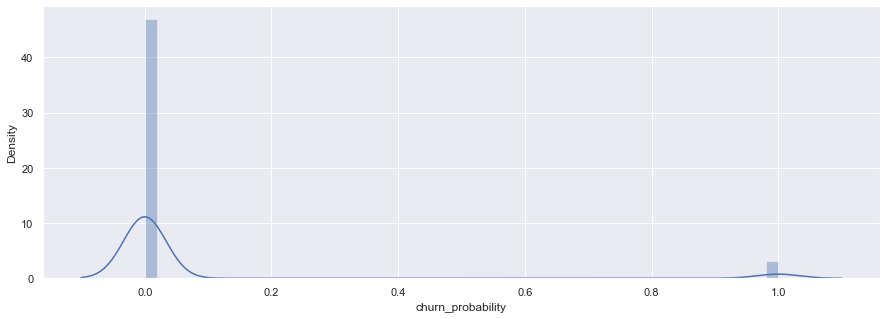

In [205]:

#sns.distplot(y_balance)
sns.distplot(y)
plt.show()


### Performing PCA

In [206]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)
X_train, X_test, y_train, y_test = train_test_split(X_balance,y_balance, train_size=0.7,test_size=0.3,random_state=100)

In [207]:
from sklearn.decomposition import PCA
pca = PCA(random_state=42)

In [208]:
pca.fit(X_train)

PCA(random_state=42)

In [209]:
#Components from the PCA
pca.components_

array([[ 1.14755762e-01,  1.13061012e-01,  6.01563844e-02, ...,
         0.00000000e+00,  0.00000000e+00,  4.07244322e-02],
       [ 1.22475195e-01,  1.40434557e-01,  1.63062093e-01, ...,
        -0.00000000e+00, -0.00000000e+00,  2.72369530e-02],
       [ 1.15223923e-01,  1.20712813e-01,  1.05613979e-01, ...,
         0.00000000e+00,  0.00000000e+00, -5.26549009e-03],
       ...,
       [-0.00000000e+00, -9.81866705e-18, -7.26263880e-18, ...,
        -0.00000000e+00, -0.00000000e+00,  3.29772240e-18],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
        -1.00000000e+00, -0.00000000e+00, -0.00000000e+00]])

In [210]:
# Looking at the explained variance ratio for each component
pca.explained_variance_ratio_

array([1.02513848e-01, 9.68541666e-02, 6.36241847e-02, 5.22908140e-02,
       4.57113424e-02, 4.08306622e-02, 3.53822233e-02, 3.09537548e-02,
       2.42258400e-02, 2.28707493e-02, 2.26514388e-02, 1.99357145e-02,
       1.81049325e-02, 1.77720958e-02, 1.63000429e-02, 1.57508018e-02,
       1.54039170e-02, 1.48284894e-02, 1.44174417e-02, 1.35648213e-02,
       1.34622413e-02, 1.20411599e-02, 1.14954953e-02, 1.07197511e-02,
       1.02820624e-02, 9.50909435e-03, 9.19889618e-03, 8.76627052e-03,
       8.44611352e-03, 8.36496568e-03, 8.08743302e-03, 7.58016554e-03,
       7.08120104e-03, 7.06475562e-03, 6.92743297e-03, 6.82112460e-03,
       6.63610528e-03, 6.48942570e-03, 6.12507082e-03, 5.74036000e-03,
       5.66968171e-03, 5.54448253e-03, 5.34482998e-03, 5.21608995e-03,
       4.89206719e-03, 4.82007505e-03, 4.60492029e-03, 4.45612723e-03,
       4.25606271e-03, 4.15636853e-03, 4.04235925e-03, 3.65724658e-03,
       3.51330373e-03, 3.46872263e-03, 3.37437235e-03, 3.27671185e-03,
      

In [211]:
# Making a scree plot for the explained variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)

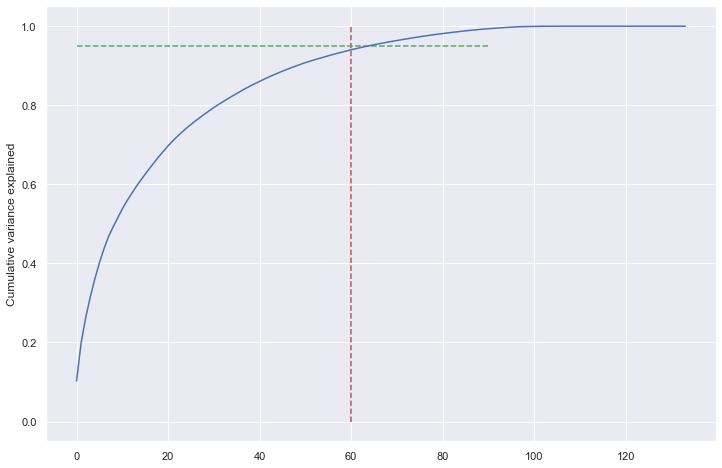

In [212]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=60, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=90, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

Perform PCA with 60 components

In [213]:
from sklearn.decomposition import IncrementalPCA

In [214]:
pca_final = IncrementalPCA(n_components=60)

In [215]:
X_train_pca = pca_final.fit_transform(X_train)

In [216]:
X_train_pca.shape

(26087, 60)

In [217]:
corrmat = np.corrcoef(X_train_pca.transpose())

In [218]:
corrmat.shape

(60, 60)

<AxesSubplot:>

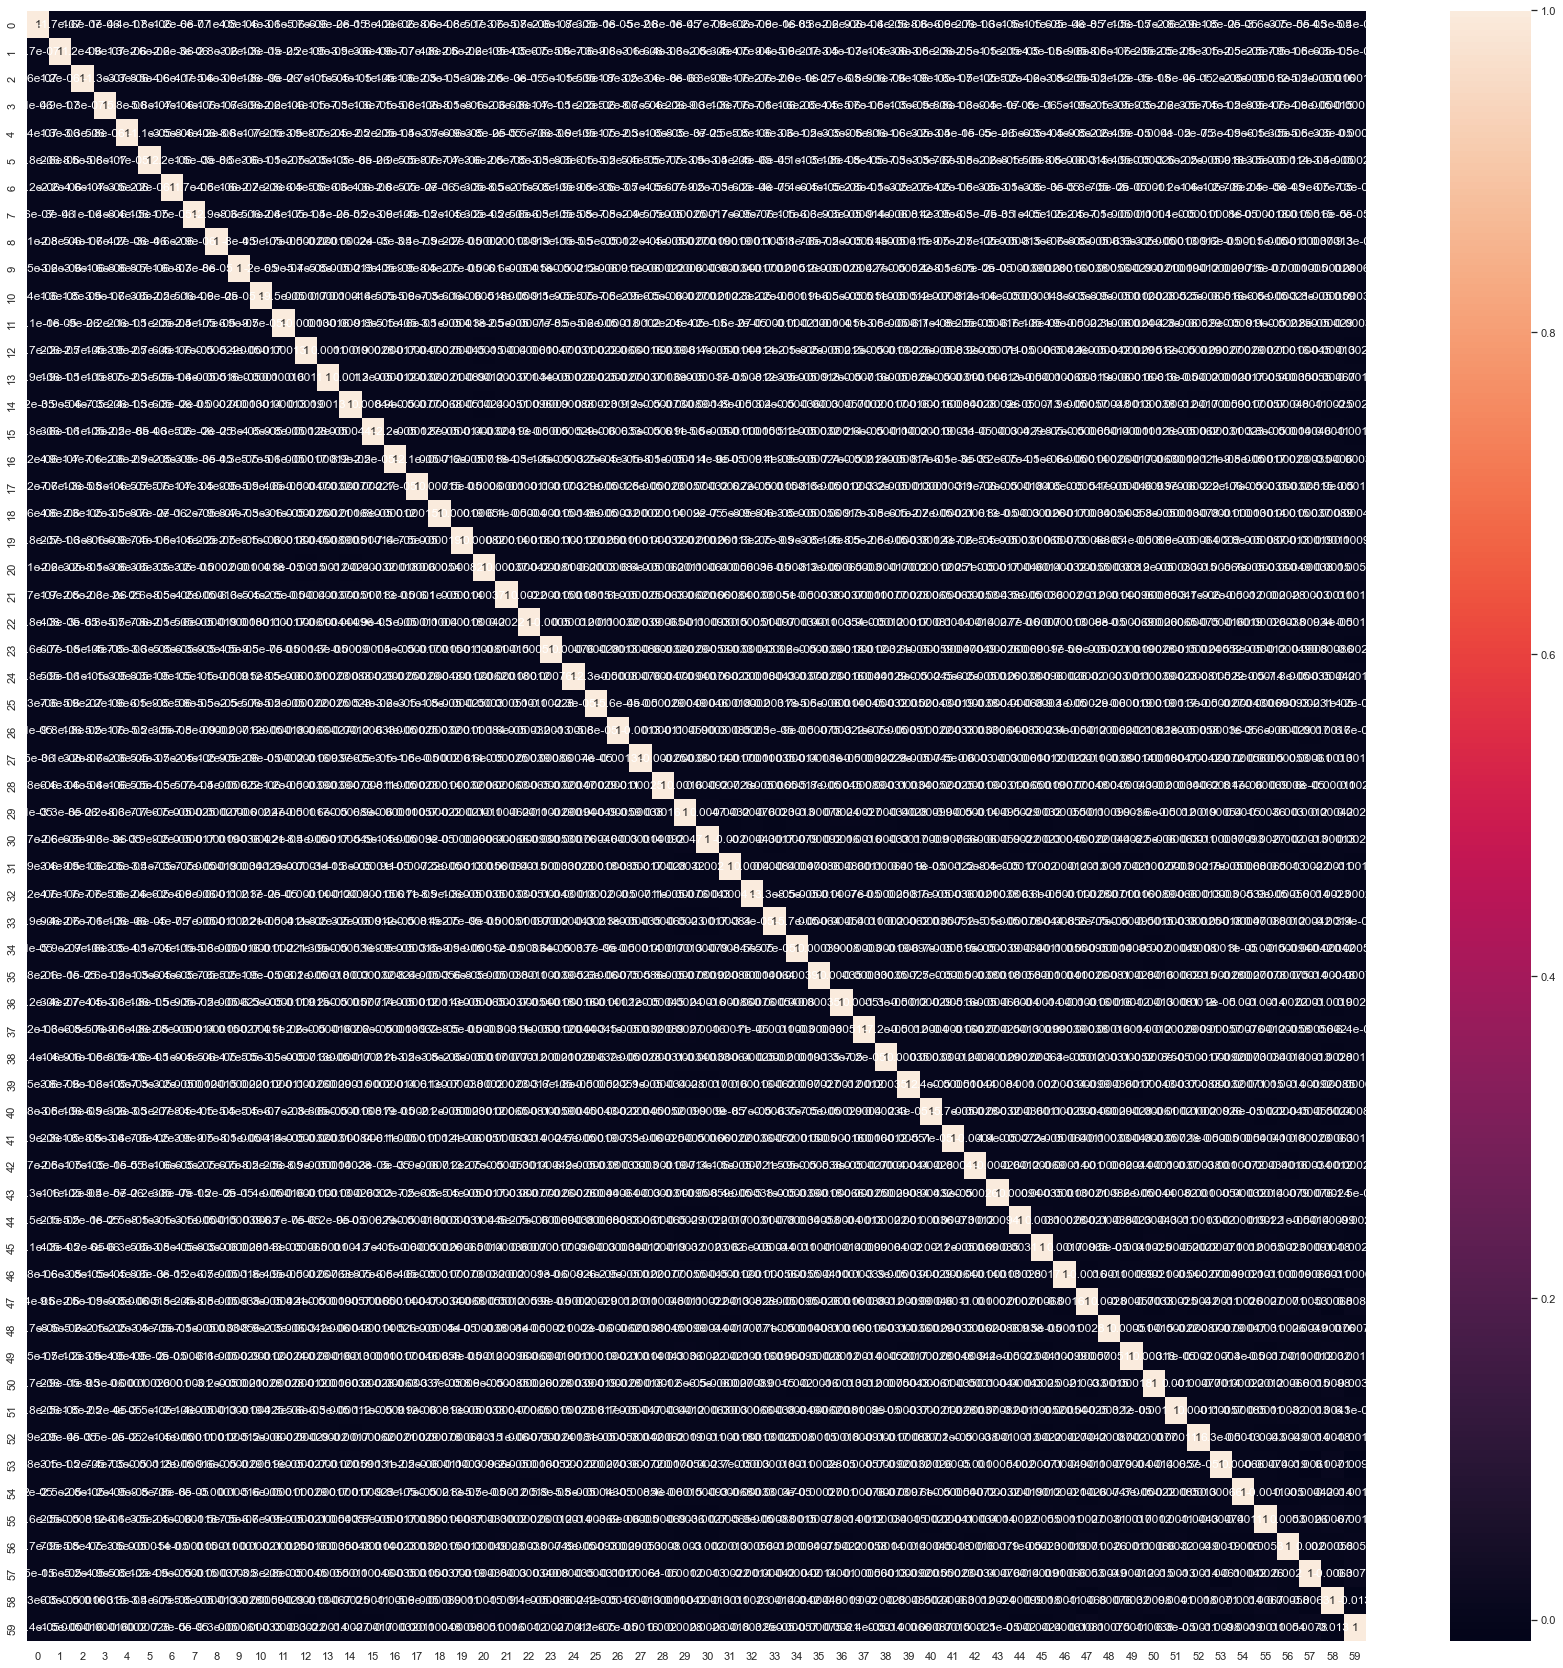

In [219]:
#Plotting the heatmap of the corr matrix
plt.figure(figsize=[30,30])
sns.heatmap(corrmat, annot=True)

In [220]:
#Applying the transformation on the test set
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(11181, 60)

## Model Building

### 1.  Logistic regression on the data on Principal components

In [221]:
from sklearn.linear_model import LogisticRegression
logistic_lerner_pca = LogisticRegression()

In [222]:
model_pca = logistic_lerner_pca.fit(X_train_pca, y_train)

In [223]:
#Making predictions on the test set
predictions = model_pca.predict_proba(X_test_pca)
predictions

array([[0.13747377, 0.86252623],
       [0.66121513, 0.33878487],
       [0.83820601, 0.16179399],
       ...,
       [0.49159821, 0.50840179],
       [0.91598146, 0.08401854],
       [0.84225907, 0.15774093]])

In [224]:
from sklearn import metrics
"{:2.2}".format(metrics.roc_auc_score(y_test, predictions[:,1]))

'0.9'

In [225]:
prediction_on_train = model_pca.predict(X_train_pca)
#model_pca.predict(X_train_pca)

In [226]:
prediction_on_train.shape


(26087,)

In [227]:
y_train.shape

(26087,)

In [228]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [229]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':prediction_on_train})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.value_counts()
#accuracy_score(y_train, prediction_on_train).round(2)

Churn  Churn_Prob  predicted
1      1           1            11198
0      0           0            10610
       1           1             2376
1      0           0             1903
dtype: int64

In [230]:
# Confusion matrix on train data
confusion = metrics.confusion_matrix(y_train, y_train_pred_final.predicted )
print(confusion)

[[10610  2376]
 [ 1903 11198]]


In [231]:
# The overall accuracy on train data.
print(f'Accuracy : {metrics.accuracy_score(y_train, y_train_pred_final.predicted)}')

Accuracy : 0.8359719400467666


In [232]:
prediction_on_test = logistic_lerner_pca.predict(X_test_pca)
prediction_on_test.shape

(11181,)

In [233]:
y_test.shape

(11181,)

In [234]:
# Confusion matrix on test set
confusion = metrics.confusion_matrix(y_test, prediction_on_test )
print(confusion)

[[4620 1028]
 [ 815 4718]]


In [235]:
# The overall accuracy on test set.
print(f'Accuracy : {metrics.accuracy_score(y_test, prediction_on_test)}')

Accuracy : 0.8351668008228245


### 2. Logistic regression without PCA

In [236]:
import statsmodels.api as sm

In [237]:
# Initial logistic regression model using Generalized Linear Model ( Bionomial ) 
glm_binomial = sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())

In [238]:
glm_binomial.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                26087
Model:                            GLM   Df Residuals:                    25959
Model Family:                Binomial   Df Model:                          127
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9984.1
Date:                Tue, 17 Jan 2023   Deviance:                       19968.
Time:                        20:38:21   Pearson chi2:                 5.88e+04
No. Iterations:                   100   Pseudo R-squ. (CS):             0.4625
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -1.9592      0.047    -41.372      0.000      -2.052      -1.866
arpu_6                        0.0158      0.094      0.168      0.867      -0.169       0.201
arpu_7                        0.5022      0.120      4.181      0.000       0.267       0.738
arpu_8                        0.8335      0.135      6.182      0.000       0.569       1.098
onnet_mou_6                  -4.6255      2.259     -2.047      0.041      -9.054      -0.197
onnet_mou_7                  -0.7230      1.606     -0.450      0.653      -3.871       2.425
onnet_mou_8                   0.9078      1.808      0.502      0.616      -2.637       4.452
offnet_mou_6                 -4.4052      2.244     -1.963      0.050      -8.803      -0.007
offnet_mou_7                 -0.9197      1.505     -0.611      0.541      -3.870       2.030
offnet_mou_8                 -0.2213      1.715     -0.129      0.897      -3.583       3.140
roam_ic_mou_6                 0.0848      0.031      2.760      0.006       0.025       0.145
roam_ic_mou_7                 0.0549      0.039      1.426      0.154      -0.021       0.130
roam_ic_mou_8                 0.0354      0.032      1.103      0.270      -0.027       0.098
roam_og_mou_6                 1.2090      0.593      2.040      0.041       0.047       2.371
roam_og_mou_7                 0.2273      0.321      0.709      0.478      -0.401       0.856
roam_og_mou_8                 0.0591      0.405      0.146      0.884      -0.735       0.853
loc_og_t2t_mou_6            129.3242    875.039      0.148      0.883   -1585.720    1844.368
loc_og_t2t_mou_7           -920.6511    916.221     -1.005      0.315   -2716.412     875.110
loc_og_t2t_mou_8           7307.9503    897.675      8.141      0.000    5548.540    9067.360
loc_og_t2m_mou_6            132.8221    901.762      0.147      0.883   -1634.598    1900.243
loc_og_t2m_mou_7           -847.3148    843.341     -1.005      0.315   -2500.234     805.604
loc_og_t2m_mou_8           6811.8465    836.675      8.142      0.000    5171.993    8451.700
loc_og_t2f_mou_6             11.4423     76.238      0.150      0.881    -137.982     160.866
loc_og_t2f_mou_7            -77.8660     77.198     -1.009      0.313    -229.171      73.439
loc_og_t2f_mou_8            598.1824     73.461      8.143      0.000     454.201     742.164
loc_og_t2c_mou_6              0.0051      0.024      0.216      0.829      -0.041       0.051
loc_og_t2c_mou_7              0.0705      0.031      2.259      0.024       0.009       0.132
loc_og_t2c_mou_8              0.0468      0.033      1.403      0.161      -0.019       0.112
loc_og_mou_6              -3581.6462   1692.572     -2.116      0.034   -6899.026    -264.267
loc_og_mou_7               -370.0054   1737.786     -0.213      0.831   -37

#### RFE : recursive feature elemeination

In [239]:
# importing RFE and Logistic Regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [240]:
# Running RFE with the output number of variable equal to 60
logistic_model = LogisticRegression()
logistic_model.fit(X_train,y_train)

recursive_feature_elemeination = RFE(estimator=logistic_model, n_features_to_select=60)
recursive_feature_elemeination = recursive_feature_elemeination.fit(X_train,y_train)

In [241]:
# See rank of the variables selected by RFE
list(zip(X_train.columns, recursive_feature_elemeination.support_, recursive_feature_elemeination.ranking_))

[('arpu_6', False, 58),
 ('arpu_7', True, 1),
 ('arpu_8', True, 1),
 ('onnet_mou_6', False, 17),
 ('onnet_mou_7', True, 1),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', False, 9),
 ('offnet_mou_7', True, 1),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 10),
 ('roam_ic_mou_7', True, 1),
 ('roam_ic_mou_8', False, 35),
 ('roam_og_mou_6', False, 52),
 ('roam_og_mou_7', False, 18),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', True, 1),
 ('loc_og_t2t_mou_7', False, 37),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', True, 1),
 ('loc_og_t2m_mou_7', False, 20),
 ('loc_og_t2m_mou_8', False, 42),
 ('loc_og_t2f_mou_6', True, 1),
 ('loc_og_t2f_mou_7', True, 1),
 ('loc_og_t2f_mou_8', False, 12),
 ('loc_og_t2c_mou_6', False, 59),
 ('loc_og_t2c_mou_7', False, 31),
 ('loc_og_t2c_mou_8', False, 5),
 ('loc_og_mou_6', False, 47),
 ('loc_og_mou_7', False, 67),
 ('loc_og_mou_8', False, 7),
 ('std_og_t2t_mou_6', True, 1),
 ('std_og_t2t_mou_7', False, 19),
 ('std_og_t2t_mou_8', True, 1)

In [242]:
# Checking selected feature by RFE
feature_selected_by_rfe = X_train.columns[recursive_feature_elemeination.support_]
feature_selected_by_rfe

Index(['arpu_7', 'arpu_8', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_7',
       'offnet_mou_8', 'roam_ic_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'std_og_t2t_mou_6', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'spl_og_mou_8', 'og_others_6',
       'og_others_7', 'og_others_8', 'total_og_mou_8', 'loc_ic_t2t_mou_7',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
       'loc_ic_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7',
       'std_ic_t2t_mou_8', 'std_ic_mou_8', 'total_ic_mou_7', 'total_ic_mou_8',
       'spl_ic_mou_7', 'spl_ic_mou_8', 'ic_others_7', 'total_rech_num_7',
       'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7',
       'total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_8',
       'last_day

In [243]:
# Building a model using RFE selected feature

# Creating X_train data frame with RFE selected variables
X_train_rfe = X_train[feature_selected_by_rfe]

In [244]:
# Adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

In [245]:
#  logistic regression model using Generalized Linear Model ( Bionomial ) 
glm_binomial_2 = sm.GLM(y_train,X_train_rfe, family=sm.families.Binomial()).fit()

In [246]:
glm_binomial_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                26087
Model:                            GLM   Df Residuals:                    26027
Model Family:                Binomial   Df Model:                           59
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10199.
Date:                Tue, 17 Jan 2023   Deviance:                       20397.
Time:                        20:38:42   Pearson chi2:                 7.76e+04
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4536
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.9585      0.046    -42.122      0.000      -2.050      -1.867
arpu_7                      0.4920      0.100      4.926      0.000       0.296       0.688
arpu_8                      0.8181      0.126      6.495      0.000       0.571       1.065
onnet_mou_7                 0.2470      0.044      5.668      0.000       0.162       0.332
onnet_mou_8                 0.1336      1.397      0.096      0.924      -2.604       2.871
offnet_mou_7                0.2347      0.101      2.325      0.020       0.037       0.433
offnet_mou_8               -0.9984      1.330     -0.751      0.453      -3.605       1.608
roam_ic_mou_7               0.1655      0.026      6.283      0.000       0.114       0.217
roam_og_mou_8               0.2944      0.312      0.943      0.346      -0.318       0.907
loc_og_t2t_mou_6            0.1738      0.035      5.003      0.000       0.106       0.242
loc_og_t2t_mou_8           -0.5653      0.193     -2.937      0.003      -0.943      -0.188
loc_og_t2m_mou_6           -0.1971      0.046     -4.321      0.000      -0.287      -0.108
loc_og_t2f_mou_6            0.2131      0.051      4.200      0.000       0.114       0.312
loc_og_t2f_mou_7           -0.2571      0.058     -4.446      0.000      -0.370      -0.144
std_og_t2t_mou_6            0.0995      0.029      3.375      0.001       0.042       0.157
std_og_t2t_mou_8           -0.4085      0.309     -1.322      0.186      -1.014       0.197
std_og_t2m_mou_7            0.1572      0.094      1.679      0.093      -0.026       0.341
std_og_t2m_mou_8            0.4883      0.119      4.115      0.000       0.256       0.721
std_og_t2f_mou_6           -0.2665      0.057     -4.660      0.000      -0.379      -0.154
std_og_t2f_mou_7            0.1319      0.053      2.493      0.013       0.028       0.236
std_og_t2f_mou_8           -0.1182      0.058     -2.043      0.041      -0.232      -0.005
spl_og_mou_8               -0.1447      0.040     -3.659      0.000      -0.222      -0.067
og_others_6                -0.1441      0.024     -5.979      0.000      -0.191      -0.097
og_others_7                -0.9540      1.067     -0.894      0.371      -3.046       1.138
og_others_8                -4.1898      1.289     -3.250      0.001      -6.716      -1.663
total_og_mou_8             -0.1369      1.953     -0.070      0.944      -3.964       3.690
loc_ic_t2t_mou_7            0.1479      0.068      2.187      0.029       0.015       0.280
loc_ic_t2t_mou_8         7388.7234    520.386     14.199      0.000    6368.785    8408.662
loc_ic_t2m_mou_6            0.2642      0.051      5.189      0.000       0.164       0.364
loc_ic_t2m_mou_7            0.1735      0.086      2.012      0.044       0.004       0.343
loc_ic_t2m_mou_8         9748.2150    686.581  

In [247]:
prediction_on_train_1 = glm_binomial_2.predict(X_train_rfe)

In [248]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':prediction_on_train_1})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
10022,0,0.598793,1
9988,0,0.001700,0
29053,1,0.854347,1
19307,0,0.287460,0
24946,1,0.915562,1


In [249]:
# Confusion matrix on train data
confusion = metrics.confusion_matrix(y_train, y_train_pred_final.predicted )
print(confusion)


[[10710  2276]
 [ 1822 11279]]


In [250]:
# The overall accuracy on train data.
print(f'Accuracy : {metrics.accuracy_score(y_train, y_train_pred_final.predicted)}')

Accuracy : 0.8429102618162303


In [251]:

# Checking VIF for feature variable

from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train_vif = X_train_rfe.drop(['const'],axis=1)

vif = pd.DataFrame()
X = X_train_vif
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif


,Features,VIF
45,total_rech_amt_7,inf
44,total_rech_amt_6,inf
58,avg_rech_amt,inf
32,loc_ic_mou_8,2.247110e+09
29,loc_ic_t2m_mou_8,1.053042e+09
26,loc_ic_t2t_mou_8,5.019439e+08
31,loc_ic_t2f_mou_8,3.860123e+07
24,total_og_mou_8,5.405840e+03
3,onnet_mou_8,2.581550e+03
5,offnet_mou_8,2.283140e+03


In [252]:

# VIF is quite high for total_og_mou_8  column . So dropping the column and checking VIF again
X_train_rfe = X_train_rfe.drop(["total_og_mou_8"], axis=1)


In [253]:

# Checking VIF for feature variable

X_train_vif = X_train_rfe.drop(['const'],axis=1)

vif = pd.DataFrame()
X = X_train_vif
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif


,Features,VIF
44,total_rech_amt_7,inf
57,avg_rech_amt,inf
43,total_rech_amt_6,inf
31,loc_ic_mou_8,2.244446e+09
28,loc_ic_t2m_mou_8,1.051794e+09
25,loc_ic_t2t_mou_8,5.013489e+08
30,loc_ic_t2f_mou_8,3.855549e+07
3,onnet_mou_8,1.309100e+02
14,std_og_t2t_mou_8,9.932000e+01
37,total_ic_mou_8,3.505000e+01


In [254]:

# VIF is quite high for onnet_mou_8  column . So dropping the column and checking VIF again
X_train_rfe = X_train_rfe.drop(["onnet_mou_8"], axis=1)


In [255]:

# Checking VIF for feature variable

X_train_vif = X_train_rfe.drop(['const'],axis=1)

vif = pd.DataFrame()
X = X_train_vif
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif


,Features,VIF
56,avg_rech_amt,inf
43,total_rech_amt_7,inf
42,total_rech_amt_6,inf
30,loc_ic_mou_8,2.243850e+09
27,loc_ic_t2m_mou_8,1.051514e+09
24,loc_ic_t2t_mou_8,5.012156e+08
29,loc_ic_t2f_mou_8,3.854525e+07
36,total_ic_mou_8,3.505000e+01
3,offnet_mou_7,2.597000e+01
1,arpu_8,2.502000e+01


In [256]:

# VIF is quite high for offnet_mou_8  column . So dropping the column and checking VIF again
X_train_rfe = X_train_rfe.drop(["offnet_mou_8"], axis=1)


In [257]:

# Checking VIF for feature variable

X_train_vif = X_train_rfe.drop(['const'],axis=1)

vif = pd.DataFrame()
X = X_train_vif
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif


,Features,VIF
55,avg_rech_amt,inf
42,total_rech_amt_7,inf
41,total_rech_amt_6,inf
29,loc_ic_mou_8,2.243174e+09
26,loc_ic_t2m_mou_8,1.051198e+09
23,loc_ic_t2t_mou_8,5.010647e+08
28,loc_ic_t2f_mou_8,3.853365e+07
35,total_ic_mou_8,3.503000e+01
43,total_rech_amt_8,2.477000e+01
1,arpu_8,2.415000e+01


In [258]:

# VIF is quite high for loc_ic_mou_8  column . So dropping the column and checking VIF again
X_train_rfe = X_train_rfe.drop(["loc_ic_mou_8"], axis=1)


In [259]:

# Checking VIF for feature variable

X_train_vif = X_train_rfe.drop(['const'],axis=1)

vif = pd.DataFrame()
X = X_train_vif
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif


,Features,VIF
41,total_rech_amt_7,inf
54,avg_rech_amt,inf
40,total_rech_amt_6,inf
34,total_ic_mou_8,35.03
42,total_rech_amt_8,24.77
1,arpu_8,24.12
3,offnet_mou_7,19.26
13,std_og_t2m_mou_7,18.31
0,arpu_7,16.68
26,loc_ic_t2m_mou_8,16.10


In [262]:

#VIF is quite high for loc_ic_mou_7  column . So dropping the column and checking VIF again
#X_train_rfe = X_train_rfe.drop(["loc_ic_mou_7"], axis=1)
X_train_rfe = X_train_rfe.drop(["total_rech_amt_7"], axis=1)

In [263]:

# Checking VIF for feature variable

X_train_vif = X_train_rfe.drop(['const'],axis=1)

vif = pd.DataFrame()
X = X_train_vif
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif


,Features,VIF
53,avg_rech_amt,40.84
34,total_ic_mou_8,35.03
41,total_rech_amt_8,24.77
1,arpu_8,24.12
3,offnet_mou_7,19.26
13,std_og_t2m_mou_7,18.31
0,arpu_7,16.68
26,loc_ic_t2m_mou_8,16.10
40,total_rech_amt_6,15.13
33,total_ic_mou_7,14.60


In [264]:
 
#VIF is quite high for total_ic_mou_8  column . So dropping the column and checking VIF again
#X_train_rfe = X_train_rfe.drop(["total_ic_mou_8"], axis=1)
X_train_rfe = X_train_rfe.drop(["avg_rech_amt"], axis=1)

In [265]:

# Checking VIF for feature variable

X_train_vif = X_train_rfe.drop(['const'],axis=1)

vif = pd.DataFrame()
X = X_train_vif
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif


,Features,VIF
34,total_ic_mou_8,35.02
41,total_rech_amt_8,21.63
1,arpu_8,20.01
3,offnet_mou_7,19.25
13,std_og_t2m_mou_7,18.31
26,loc_ic_t2m_mou_8,16.10
33,total_ic_mou_7,14.60
25,loc_ic_t2m_mou_7,10.15
23,loc_ic_t2t_mou_8,8.11
32,std_ic_mou_8,5.75


In [267]:
#VIF is quite high for std_og_mou_6  column . So dropping the column and checking VIF again
#X_train_rfe = X_train_rfe.drop(["std_og_mou_6"], axis=1)
X_train_rfe = X_train_rfe.drop(["total_ic_mou_8"], axis=1)

In [268]:

# Checking VIF for feature variable

X_train_vif = X_train_rfe.drop(['const'],axis=1)

vif = pd.DataFrame()
X = X_train_vif
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif


,Features,VIF
40,total_rech_amt_8,21.63
1,arpu_8,19.99
3,offnet_mou_7,19.24
13,std_og_t2m_mou_7,18.30
33,total_ic_mou_7,11.89
25,loc_ic_t2m_mou_7,9.14
2,onnet_mou_7,5.37
0,arpu_7,5.01
22,loc_ic_t2t_mou_7,4.72
38,total_rech_num_8,4.11


In [269]:

#VIF is quite high for std_og_t2t_mou_7  column . So dropping the column and checking VIF again
#X_train_rfe = X_train_rfe.drop(["std_og_t2t_mou_7"], axis=1)
X_train_rfe = X_train_rfe.drop(["total_rech_amt_8"], axis=1)

In [270]:

# Checking VIF for feature variable

X_train_vif = X_train_rfe.drop(['const'],axis=1)

vif = pd.DataFrame()
X = X_train_vif
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif


,Features,VIF
3,offnet_mou_7,19.12
13,std_og_t2m_mou_7,18.14
33,total_ic_mou_7,11.89
25,loc_ic_t2m_mou_7,9.14
1,arpu_8,6.71
2,onnet_mou_7,5.37
0,arpu_7,5.01
22,loc_ic_t2t_mou_7,4.72
30,std_ic_t2t_mou_7,4.08
38,total_rech_num_8,3.99


In [271]:

#VIF is quite high for total_rech_amt_8  column . So dropping the column and checking VIF again
#X_train_rfe = X_train_rfe.drop(["total_rech_amt_8"], axis=1)
X_train_rfe = X_train_rfe.drop(["offnet_mou_7"], axis=1)

In [272]:

# Checking VIF for feature variable

X_train_vif = X_train_rfe.drop(['const'],axis=1)

vif = pd.DataFrame()
X = X_train_vif
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif


,Features,VIF
32,total_ic_mou_7,11.87
24,loc_ic_t2m_mou_7,8.83
1,arpu_8,6.68
2,onnet_mou_7,5.33
21,loc_ic_t2t_mou_7,4.72
0,arpu_7,4.53
29,std_ic_t2t_mou_7,4.08
37,total_rech_num_8,3.98
25,loc_ic_t2m_mou_8,3.94
44,vol_3g_mb_8,3.72


In [273]:

#VIF is quite high for total_rech_amt_8  column . So dropping the column and checking VIF again
X_train_rfe = X_train_rfe.drop(["total_ic_mou_7"], axis=1)

In [274]:
# Checking VIF for feature variable

X_train_vif = X_train_rfe.drop(['const'],axis=1)

vif = pd.DataFrame()
X = X_train_vif
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif


,Features,VIF
1,arpu_8,6.68
2,onnet_mou_7,5.32
24,loc_ic_t2m_mou_7,4.56
0,arpu_7,4.53
36,total_rech_num_8,3.98
25,loc_ic_t2m_mou_8,3.93
43,vol_3g_mb_8,3.72
23,loc_ic_t2m_mou_6,3.50
10,std_og_t2t_mou_6,3.33
9,loc_og_t2f_mou_7,3.29


#### While running VIF in recursively it dropping 1 extra feature which reduce the accuracy to 60% from 93%. So commenting the recursive method.

In [ ]:
'''
#  A Routine to calculate VIF and drop column based on given threshold for a data set ( Time consuming process )
def calculate_vif(X, thresh=10.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]
'''

In [ ]:
'''
# Dropping variable having VIF > 5. This will take around 15 minutes for 280 variable with 1460 rows with 100% cpu 
X_train_vif = X_train_rfe.drop(['const'],axis=1)
X_train_rfe = calculate_vif(X_train_vif)
'''

In [275]:
# Now the VIF is in acceptable range ir less than 5. Now we can again build the model using these features
# logistic regression model using Generalized Linear Model ( Bionomial ) 
glm_binomial_3 = sm.GLM(y_train,X_train_rfe, family=sm.families.Binomial()).fit()

In [276]:
glm_binomial_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                26087
Model:                            GLM   Df Residuals:                    26036
Model Family:                Binomial   Df Model:                           50
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10370.
Date:                Tue, 17 Jan 2023   Deviance:                       20740.
Time:                        20:44:25   Pearson chi2:                 6.97e+04
No. Iterations:                    12   Pseudo R-squ. (CS):             0.4464
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.9550      0.045    -43.355      0.000      -2.043      -1.867
arpu_7                      0.0134      0.051      0.264      0.792      -0.086       0.113
arpu_8                      0.0186      0.062      0.299      0.765      -0.103       0.140
onnet_mou_7                 0.2586      0.044      5.931      0.000       0.173       0.344
roam_ic_mou_7               0.1905      0.025      7.628      0.000       0.142       0.239
roam_og_mou_8               0.2638      0.025     10.761      0.000       0.216       0.312
loc_og_t2t_mou_6            0.1724      0.036      4.848      0.000       0.103       0.242
loc_og_t2t_mou_8           -0.5844      0.066     -8.871      0.000      -0.713      -0.455
loc_og_t2m_mou_6           -0.3342      0.035     -9.554      0.000      -0.403      -0.266
loc_og_t2f_mou_6            0.2219      0.051      4.379      0.000       0.123       0.321
loc_og_t2f_mou_7           -0.3030      0.058     -5.231      0.000      -0.417      -0.189
std_og_t2t_mou_6            0.1124      0.029      3.847      0.000       0.055       0.170
std_og_t2t_mou_8           -0.3392      0.040     -8.417      0.000      -0.418      -0.260
std_og_t2m_mou_7            0.3650      0.035     10.462      0.000       0.297       0.433
std_og_t2m_mou_8           -0.4384      0.043    -10.079      0.000      -0.524      -0.353
std_og_t2f_mou_6           -0.2683      0.056     -4.791      0.000      -0.378      -0.159
std_og_t2f_mou_7            0.1570      0.052      3.018      0.003       0.055       0.259
std_og_t2f_mou_8           -0.1636      0.059     -2.769      0.006      -0.279      -0.048
spl_og_mou_8               -0.2020      0.036     -5.581      0.000      -0.273      -0.131
og_others_6                -0.1308      0.024     -5.539      0.000      -0.177      -0.085
og_others_7                -0.6012      0.937     -0.641      0.521      -2.439       1.236
og_others_8                -3.9127      1.258     -3.109      0.002      -6.379      -1.446
loc_ic_t2t_mou_7            0.3014      0.050      6.007      0.000       0.203       0.400
loc_ic_t2t_mou_8           -0.7600      0.083     -9.131      0.000      -0.923      -0.597
loc_ic_t2m_mou_6            0.3345      0.050      6.682      0.000       0.236       0.433
loc_ic_t2m_mou_7            0.4035      0.061      6.649      0.000       0.285       0.522
loc_ic_t2m_mou_8           -1.5355      0.076    -20.097      0.000      -1.685      -1.386
loc_ic_t2f_mou_7           -0.0690      0.055     -1.247      0.212      -0.177       0.039
loc_ic_t2f_mou_8           -0.3788      0.078     -4.873      0.000      -0.531      -0.226
std_ic_t2t_mou_6            0.1081      0.033      3.257      0.001       0.043       0.173
std_ic_t2t_mou_7            0.1800      0.043  

In [277]:
prediction_on_train_3 = glm_binomial_3.predict(X_train_rfe)

In [278]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':prediction_on_train_3})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head(10)

,Churn,Churn_Prob,predicted
10022,0,5.068866e-01,1
9988,0,3.408808e-03,0
29053,1,8.303770e-01,1
19307,0,3.383984e-01,0
24946,1,9.257626e-01,1
20871,1,8.800960e-01,1
16842,0,2.796955e-01,0
35293,1,7.781009e-01,1
12841,0,7.017006e-02,0
33311,1,9.229341e-01,1


In [279]:
# Confusion matrix on train data
confusion = metrics.confusion_matrix(y_train, y_train_pred_final.predicted )
print(confusion)

[[10655  2331]
 [ 1798 11303]]


In [280]:
# The overall accuracy on train data.
print(f'Accuracy : {metrics.accuracy_score(y_train, y_train_pred_final.predicted)}')

Accuracy : 0.8417219304634492


### Observation
 - From above we see that accuracy is almost same while using RFE and VIF and while using PCA for logistic regression
 - We can also see the important features from the VIF table above

### 3. Random forest with PCA

In [281]:
from sklearn.ensemble import RandomForestClassifier

In [282]:
rf = RandomForestClassifier(n_jobs=-1, bootstrap=True,
                             max_depth=4,
                             min_samples_leaf=50, 
                             min_samples_split=50,
                             max_features=8,
                             n_estimators=60)
rf.fit(X_train_pca,y_train)

RandomForestClassifier(max_depth=4, max_features=8, min_samples_leaf=50,
                       min_samples_split=50, n_estimators=60, n_jobs=-1)

In [283]:
predictions_test = rf.predict(X_test_pca)

In [284]:
prediction_train = rf.predict(X_train_pca)

In [285]:
# Train Accuracy
print(f'Train accuracy : {metrics.accuracy_score(y_train, prediction_train)}')

Train accuracy : 0.8146586422355963


In [286]:
# Test Accuracy
print(f'Test accuracy : {metrics.accuracy_score(y_test, predictions_test)}')

Test accuracy : 0.8117341919327431


In [287]:
# Print test  report
print(metrics.classification_report(y_test, predictions_test))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82      5648
           1       0.82      0.79      0.81      5533

    accuracy                           0.81     11181
   macro avg       0.81      0.81      0.81     11181
weighted avg       0.81      0.81      0.81     11181



In [288]:
# Confusion Matrix on test set
print(confusion_matrix(y_test, predictions_test))

[[4683  965]
 [1140 4393]]


In [289]:
# Confusion Matrix on train  set
print(confusion_matrix(y_train, prediction_train))

[[10695  2291]
 [ 2544 10557]]


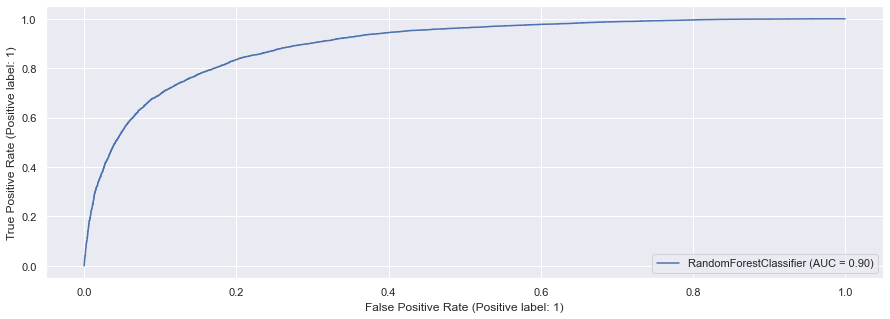

In [290]:
# Plot ROC curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rf, X_train_pca, y_train)
plt.show()

### Hyperparameter tuning to improve performace of the model

In [293]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(random_state=25, n_jobs=-1)

# Define parameters
params = {
    'max_depth': [2, 3, 5, 10, 20, 30],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'n_estimators': [10, 25, 50, 100]
}

In [294]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

#Performing grid search
grid_search.fit(X_train_pca, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=25),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 30],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [295]:
grid_search.best_score_

0.9359065204431644

In [296]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=30, min_samples_leaf=5, n_jobs=-1,
                       random_state=25)

In [301]:
prediction_train = rf_best.predict(X_train_pca)

In [302]:
# Train Accuracy
print(f'Train accuracy : {metrics.accuracy_score(y_train, prediction_train)}')

Train accuracy : 0.9882700195499674


In [303]:
# Confusion Matrix on train  set
print(confusion_matrix(y_train, prediction_train))

[[12747   239]
 [   67 13034]]


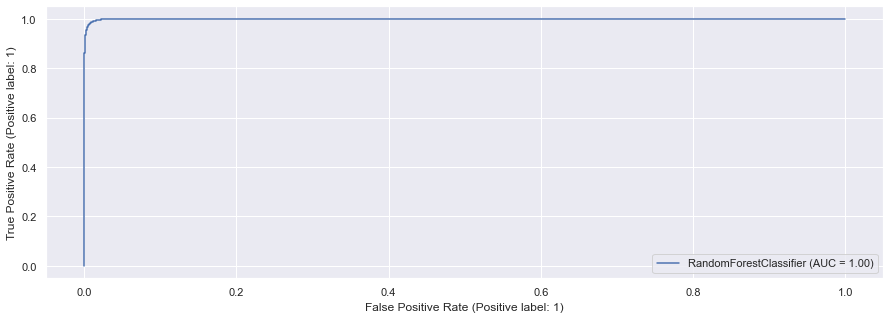

In [309]:
# Plot ROC curve on train set
plot_roc_curve(rf_best, X_train_pca, y_train)
plt.show()

In [304]:
predictions_test = rf_best.predict(X_test_pca)

In [305]:
# Test Accuracy
print(f'Test accuracy : {metrics.accuracy_score(y_test, predictions_test)}')

Test accuracy : 0.9447276629997317


In [306]:
# Confusion Matrix on test set
print(confusion_matrix(y_test, predictions_test))

[[5300  348]
 [ 270 5263]]


In [307]:
# Print test  report
print(metrics.classification_report(y_test, predictions_test))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      5648
           1       0.94      0.95      0.94      5533

    accuracy                           0.94     11181
   macro avg       0.94      0.94      0.94     11181
weighted avg       0.94      0.94      0.94     11181



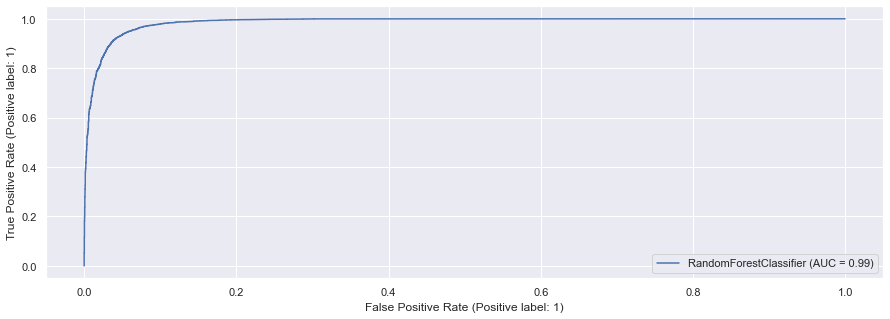

In [312]:
# Plot ROC curve on test set
plot_roc_curve(rf_best, X_test_pca, y_test)
plt.show()

## Observation 
-- We can see the performance has considerable improve while using Random forest with PCA